
###**Cardiovascular Disease dataset**

The dataset consists of 70 000 records of patients data, 11 features + target.

Features:

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/cardio_train.csv", delimiter=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Check if there are missing values
# Here there aren't missing values
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [4]:
# Drop the column "id" as it's useless here
df = df.drop(["id"], axis=1)

In [5]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
# Convert days into years (int) in the column "age"
def years(n_of_days):
  year = (n_of_days/365)
  return year

years(17474)

47.87397260273973

In [7]:
#df["age"] = years(df["age"]).astype(int)

In [8]:
df["age"] = df["age"].apply(lambda x: years(x)).astype(int)

In [9]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


0    35021
1    34979
Name: cardio, dtype: int64

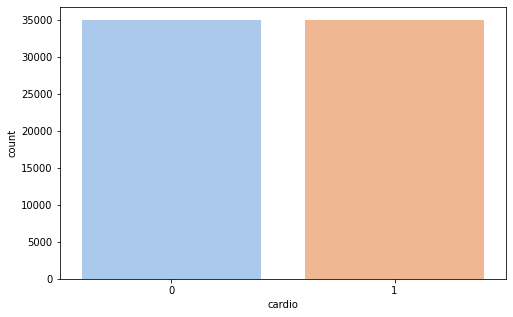

In [10]:
# Count plot for the cardio column (which is the target column)
# We can see there aren't imbalanced values (practically 50% yes, 50% no)
plt.figure(figsize=(8, 5))
sns.countplot(x="cardio", data=df, palette="pastel")
sns.set(font_scale=1.5)
df["cardio"].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

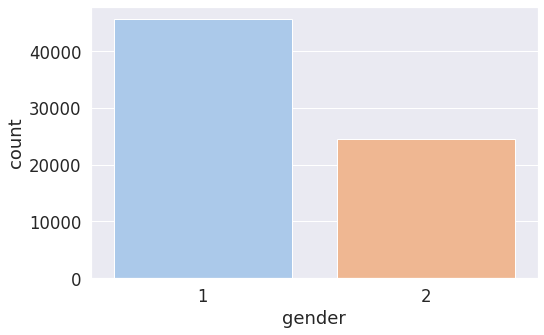

In [11]:
# Count plot for the gender column 
# In this dataset it's not stated which are the gender 1 and 2 
plt.figure(figsize=(8, 5))
sns.countplot(x="gender", data=df, palette="pastel")
sns.set(font_scale=1.5);
df["gender"].value_counts()

Text(0, 0.5, 'Frequency')

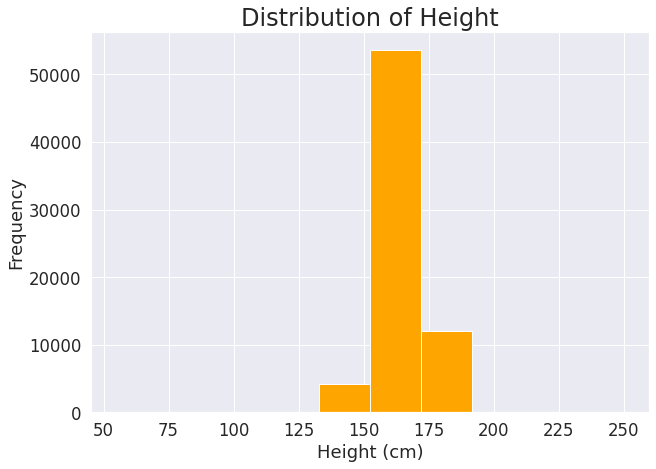

In [12]:
# Histogram for height
df.height.plot(kind='hist', color='orange', figsize=(10,7))
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (cm)', size=18)
plt.ylabel('Frequency', size=18)

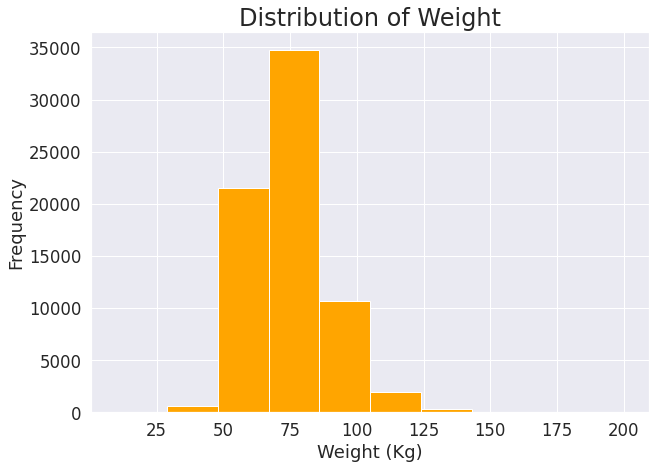

In [13]:
# Histogram for weight
df.weight.plot(kind='hist', color='orange', figsize=(10,7))
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (Kg)', size=18)
plt.ylabel('Frequency', size=18);

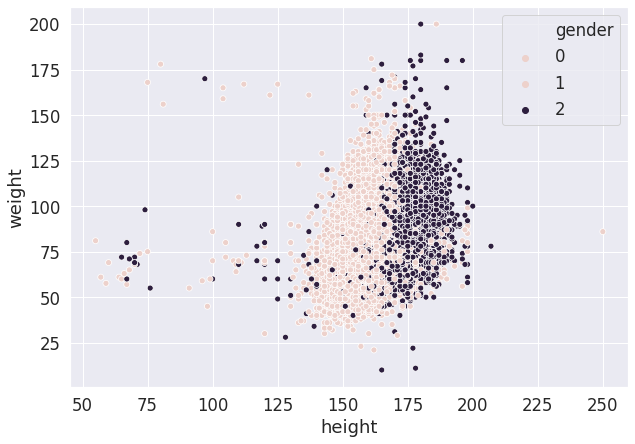

In [14]:
# Scatter plot height vs weight by gender
plt.figure(figsize=(10, 7))
ax = sns.scatterplot(x="height", y="weight", hue="gender", data=df)
sns.set(font_scale=1.7)

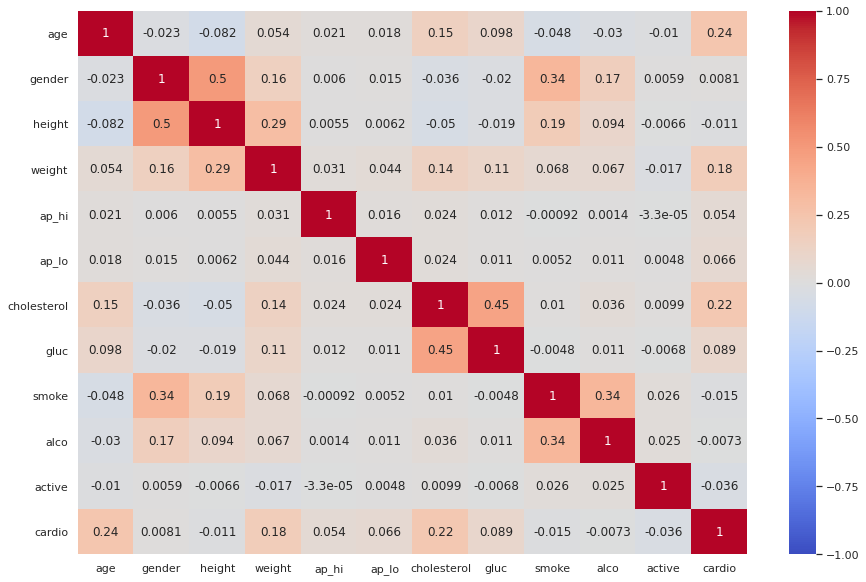

In [17]:
# Plot a correlation matrix
# There is no indicative of multicollinearity in this dataset
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
sns.set(font_scale=1)

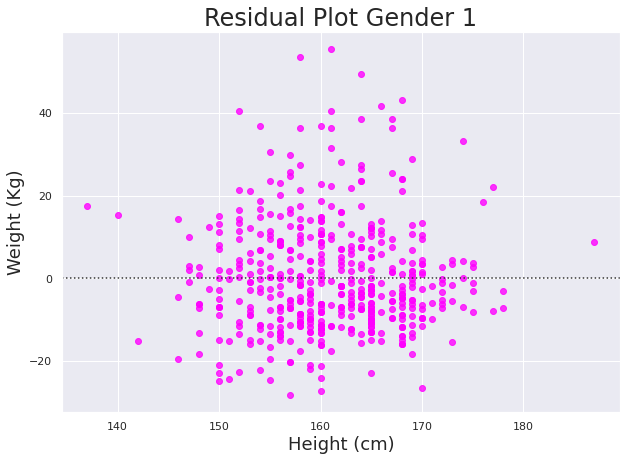

In [20]:
# Residual plots
df_1 = df[df["gender"] == 1].sample(500)

# Residual plot for 500 (sample) gender 1 sample
fig = plt.figure(figsize = (10, 7))
sns.residplot(df_1.height, df_1.weight, color='magenta')

plt.title('Residual Plot Gender 1', size=24)
plt.xlabel('Height (cm)', size=18)
plt.ylabel('Weight (Kg)', size=18);

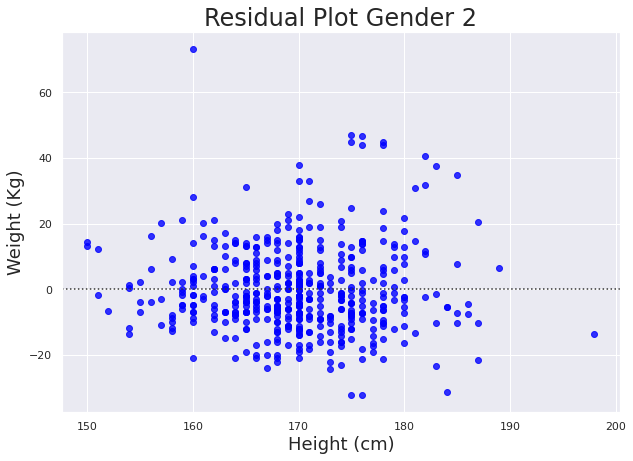

In [22]:
# Residual plots
df_2 = df[df["gender"] == 2].sample(500)

# Residual plot for 500 (sample) gender 2 sample
fig = plt.figure(figsize = (10, 7))
sns.residplot(df_2.height, df_2.weight, color='blue')

plt.title('Residual Plot Gender 2', size=24)
plt.xlabel('Height (cm)', size=18)
plt.ylabel('Weight (Kg)', size=18);

In [23]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [24]:
# Now let's check some descriptive statistics
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# Let's normalize the data by applying the Standard Scaler method (specific columns)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["age", "height", "weight", "ap_hi", "ap_lo"]] = scaler.fit_transform(df[["age", "height", "weight", "ap_hi", "ap_lo"]])
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-0.419800,2,0.443452,-0.847873,-0.122182,-0.088238,1,1,0,0,1,0
1,0.319110,1,-1.018168,0.749831,0.072610,-0.035180,3,1,0,0,1,1
2,-0.272018,1,0.078047,-0.708942,0.007679,-0.141297,3,1,0,0,0,1
3,-0.715364,2,0.565254,0.541435,0.137541,0.017879,1,1,0,0,1,1
4,-0.863146,1,-1.018168,-1.264666,-0.187113,-0.194356,1,1,0,0,0,0


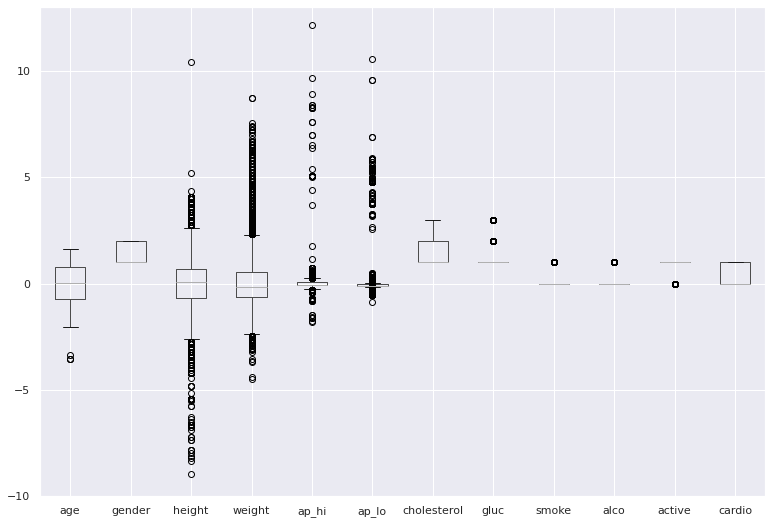

In [26]:
# Plot a Boxplot
plt.figure(figsize=(13, 9))
boxplot = df.boxplot()
plt.ylim(-10, 13)
sns.set(font_scale=0.8)

In [27]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-0.419800,2,0.443452,-0.847873,-0.122182,-0.088238,1,1,0,0,1,0
1,0.319110,1,-1.018168,0.749831,0.072610,-0.035180,3,1,0,0,1,1
2,-0.272018,1,0.078047,-0.708942,0.007679,-0.141297,3,1,0,0,0,1
3,-0.715364,2,0.565254,0.541435,0.137541,0.017879,1,1,0,0,1,1
4,-0.863146,1,-1.018168,-1.264666,-0.187113,-0.194356,1,1,0,0,0,0


In [29]:
# Transform categorical features into numerical through get_dummies method
df2 = pd.get_dummies(df, columns=["cholesterol", "gluc", "gender"], drop_first=True)
df2.head()

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_2,cholesterol_3,gluc_2,gluc_3,gender_2
0,-0.419800,0.443452,-0.847873,-0.122182,-0.088238,0,0,1,0,0,0,0,0,1
1,0.319110,-1.018168,0.749831,0.072610,-0.035180,0,0,1,1,0,1,0,0,0
2,-0.272018,0.078047,-0.708942,0.007679,-0.141297,0,0,0,1,0,1,0,0,0
3,-0.715364,0.565254,0.541435,0.137541,0.017879,0,0,1,1,0,0,0,0,1
4,-0.863146,-1.018168,-1.264666,-0.187113,-0.194356,0,0,0,0,0,0,0,0,0


In [33]:
# Let's also remove age and gender columns
#df2 = df2.drop(["age", "gender"], axis=1)

In [30]:
# Assign X and Y
X = df2.drop(["cardio"], axis=1)
y = df2["cardio"]

In [31]:
# Training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [32]:
# Let's import the SVM 
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
model.score(X_test, y_test)

0.7322380952380952

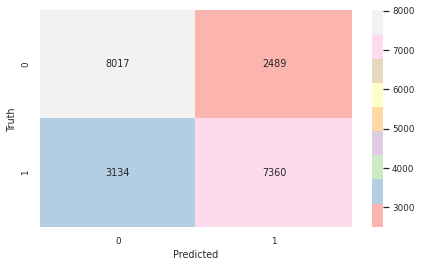

In [34]:
#  Plot the 1st confusion matrix 
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=True, fmt="g", cmap="Pastel1")
plt.xlabel("Predicted")
plt.ylabel("Truth");
plt.show();

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7322380952380952
Precision: 0.7472839882221546
Recall: 0.7013531541833429
              precision    recall  f1-score   support

           0       0.72      0.76      0.74     10506
           1       0.75      0.70      0.72     10494

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000

